Dataset Auto Labelling Based on given Phrase

In [68]:
pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [69]:
import pandas as pd
import matplotlib.pyplot as plt


In [70]:
df = pd.read_excel("/content/Health Related Policies-100 Records.xlsx")
df.shape

(99, 1)

In [71]:
df.head()

,HealthPrivacyPolicy
0,HCF: This Privacy Policy covers the HCF group ...
1,central sydney private hospital: Patient Priva...
2,St Vincent’s Private Hospital Sydne: Privacy\n...
3,The Sydney Private Hospital is committed to pr...
4,Privacy Statement for Sydney Local Health Dist...


# Without preprocessing

In [72]:
# -*- coding: utf-8 -*-
''' This program takes a excel sheet as input where each row in first column of sheet represents a document.  '''

import pandas as pd
import numpy as np


idea=df.iloc[:,0:1] #Selecting the first column that has text.

#Converting the column of data from excel sheet into a list of documents, where each document corresponds to a group of sentences.
corpus=[]
for index,row in idea.iterrows():
    corpus.append(row['HealthPrivacyPolicy'])

'''Or you could just comment out the above code and use this dummy corpus list instead if you don't have the data.
corpus=['She went to the airport to see him off.','I prefer reading to writing.','Los Angeles is in California. It's southeast of San Francisco.','I ate a burger then went to bed.','Compare your answer with Tom's.','I had hardly left home when it began to rain heavily.','If he had asked me, I would have given it to him. 
','I could have come by auto, but who would pay the fare? ','Whatever it may be, you should not have beaten him.','You should have told me yesterday','I should have joined this course last year.','Where are you going?','There are too many people here.','Everyone always asks me that.','I didn't think you were going to make it.','Be quiet while I am speaking.','I can't figure out why he said so.'] '''
    
    
#Count Vectoriser then tidf transformer

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

from sklearn.feature_extraction.text import TfidfTransformer

transformer = TfidfTransformer(smooth_idf=False)
tfidf = transformer.fit_transform(X)
print(tfidf.shape )                        

(99, 3684)


In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
v = TfidfVectorizer()
x = v.fit_transform(df['HealthPrivacyPolicy'])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


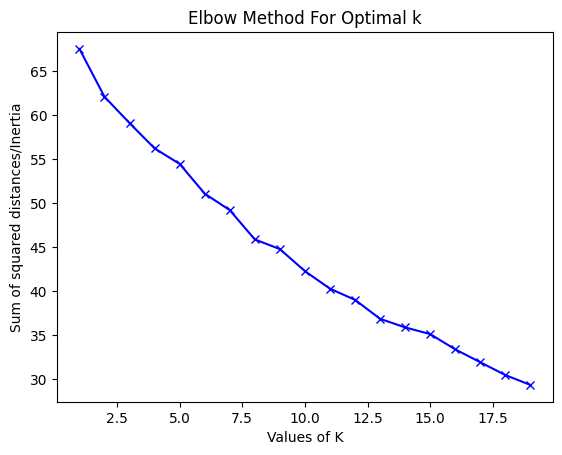

In [74]:
from sklearn.cluster import KMeans
Sum_of_squared_distances = []

K = range(1,20)
for num_clusters in K :
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(tfidf)
    Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

In [75]:
def kMeansRes(scaled_data, k, alpha_k=0.02):
    '''
    Parameters 
    ----------
    scaled_data: matrix 
        scaled data. rows are samples and columns are features for clustering
    k: int
        current k for applying KMeans
    alpha_k: float
        manually tuned factor that gives penalty to the number of clusters
    Returns 
    -------
    scaled_inertia: float
        scaled inertia value for current k           
    '''
    
    inertia_o = np.square((scaled_data - scaled_data.mean(axis=0))).sum()
    # fit k-means
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    scaled_inertia = kmeans.inertia_ / inertia_o + alpha_k * k
    return scaled_inertia

def chooseBestKforKMeans(scaled_data, k_range):
    ans = []
    for k in k_range:
        scaled_inertia = kMeansRes(scaled_data, k)
        ans.append((k, scaled_inertia))
    results = pd.DataFrame(ans, columns = ['k','Scaled Inertia']).set_index('k')
    best_k = results.idxmin()[0]
    return best_k, results

([<matplotlib.axis.XTick at 0x7f5bf554d9f0>,
 [Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19')])

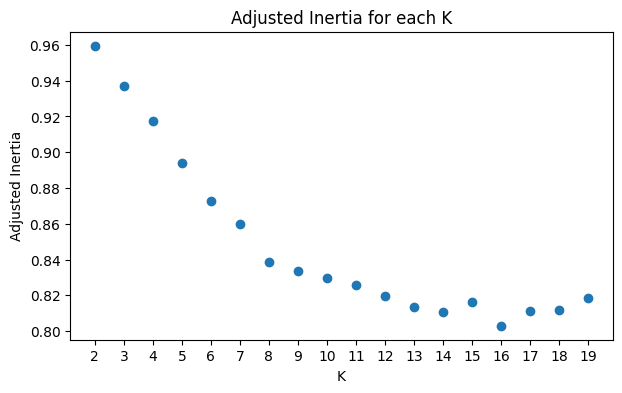

In [76]:
# choose k range
k_range=range(2,20)
# compute adjusted intertia
best_k, results = chooseBestKforKMeans(tfidf, k_range)

# plot the results
plt.figure(figsize=(7,4))
plt.plot(results,'o')
plt.title('Adjusted Inertia for each K')
plt.xlabel('K')
plt.ylabel('Adjusted Inertia')
plt.xticks(range(2,20,1))

In [77]:
from sklearn.cluster import KMeans

num_clusters = 2 #Change it according to your data.
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf)
clusters = km.labels_.tolist()

idea={'Policy':corpus, 'Label':clusters} #Creating dict having doc with the corresponding cluster number.
frame=pd.DataFrame(idea,index=[clusters], columns=['Policy','Label']) # Converting it into a dataframe.

print("\n")
print(frame) #Print the doc with the labeled cluster number.
print("\n")
print(frame['Label'].value_counts()) #Print the counts of doc belonging to each cluster.



                                               Policy  Label
1   HCF: This Privacy Policy covers the HCF group ...      1
1   central sydney private hospital: Patient Priva...      1
1   St Vincent’s Private Hospital Sydne: Privacy\n...      1
1   The Sydney Private Hospital is committed to pr...      1
1   Privacy Statement for Sydney Local Health Dist...      1
..                                                ...    ...
1   Chapel, Kolding Infirmary: We take the privacy...      1
1   er kolding hospital: This Website Privacy Poli...      1
1   lokalpsyk kolding : Thank you for using Lokal ...      1
1   This statement sets out this site's policies r...      1
1   What Types of Information do We Collect\n \nDo...      1

[99 rows x 2 columns]


1    79
0    20
Name: Label, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [78]:
frame

,Policy,Label
1,HCF: This Privacy Policy covers the HCF group ...,1
1,central sydney private hospital: Patient Priva...,1
1,St Vincent’s Private Hospital Sydne: Privacy\n...,1
1,The Sydney Private Hospital is committed to pr...,1
1,Privacy Statement for Sydney Local Health Dist...,1
...,...,...
1,"Chapel, Kolding Infirmary: We take the privacy...",1
1,er kolding hospital: This Website Privacy Poli...,1
1,lokalpsyk kolding : Thank you for using Lokal ...,1
1,This statement sets out this site's policies r...,1


In [67]:
frame.to_excel('output.xlsx')

# With preprocessing

In [79]:
import re

In [80]:
import re

def decontracted(phrase):
    # specific Labelling Phrase based on Australian APP 13 Collection of personal information
    phrase = re.sub(r"personal information", "public information", phrase)
    phrase = re.sub(r"up-to-date", "will not disclose", phrase)
    phrase = re.sub(r"reasonable steps ", "will not Share information", phrase)
    phrase = re.sub(r"refuses ", " consent", phrase)
    phrase = re.sub(r"give consent", " do not give consent", phrase)
    phrase = re.sub(r"security of personal information", "privacy of personal information", phrase)
    phrase = re.sub(r"Hold Information", "release of information", phrase)
    phrase = re.sub(r"collect information", "consent form", phrase)
    phrase = re.sub(r"Unsolicited Personal Information", "Disclosure of Personal Information", phrase)
    phrase = re.sub(r"Use or Disclosure of Personal Information", "Direct Marketing", phrase)
    phrase = re.sub(r"Cross-Border Disclosure of Personal Information", "Data modification", phrase)

    #phrase = re.sub(r"won't", "will not", phrase)
    #phrase = re.sub(r"can\'t", "can not", phrase)
    #phrase = re.sub(r"n\'t", " not", phrase)
    #phrase = re.sub(r"\'re", " are", phrase)
    #phrase = re.sub(r"\'s", " is", phrase)
    #phrase = re.sub(r"\'d", " would", phrase)
    #phrase = re.sub(r"\'ll", " will", phrase)
    #phrase = re.sub(r"\'t", " not", phrase)
    #phrase = re.sub(r"\'ve", " have", phrase)
    #phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [81]:
from tqdm import tqdm
lst = []
removed_urls_list = []
for text in tqdm(df['HealthPrivacyPolicy']):
    removed_urls_text = re.sub(r"http\S+", "", text)
    lst.append(removed_urls_text)

100%|██████████| 99/99 [00:00<00:00, 56617.96it/s]


In [82]:
#remove urls from text python
removed_urls_list = []
for text in tqdm(lst):
    removed_urls_text = re.sub(r"http\S+", "", text)
    removed_urls_list.append(removed_urls_text)

100%|██████████| 99/99 [00:00<00:00, 49216.08it/s]


In [83]:
from bs4 import BeautifulSoup
text_lst = []
for text in tqdm(removed_urls_list):
    soup = BeautifulSoup(text, 'lxml')
    text = soup.get_text()
    text_lst.append(text)

100%|██████████| 99/99 [00:00<00:00, 1751.53it/s]


In [84]:
decat_lst = []
for decat_text in tqdm(text_lst):
    text = decontracted(decat_text)
    decat_lst.append(text)

100%|██████████| 99/99 [00:00<00:00, 7282.54it/s]


In [85]:
strip_list = []
for to_strip in tqdm(decat_lst):
    text = re.sub("\S*\d\S*", "", to_strip).strip()
    strip_list.append(text)

100%|██████████| 99/99 [00:00<00:00, 1057.64it/s]


In [86]:
spatial_list = []
for to_spatial in tqdm(strip_list):
    text = re.sub('[^A-Za-z0-9]+', ' ', to_spatial)
    spatial_list.append(text)

100%|██████████| 99/99 [00:00<00:00, 203.46it/s]


In [87]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [88]:
def kMeansRes(scaled_data, k, alpha_k=0.02):
    '''
    Parameters 
    ----------
    scaled_data: matrix 
        scaled data. rows are samples and columns are features for clustering
    k: int
        current k for applying KMeans
    alpha_k: float
        manually tuned factor that gives penalty to the number of clusters
    Returns 
    -------
    scaled_inertia: float
        scaled inertia value for current k           
    '''
    
    inertia_o = np.square((scaled_data - scaled_data.mean(axis=0))).sum()
    # fit k-means
    kmeans = KMeans(n_clusters=k, random_state=0).fit(scaled_data)
    scaled_inertia = kmeans.inertia_ / inertia_o + alpha_k * k
    return scaled_inertia

def chooseBestKforKMeans(scaled_data, k_range):
    ans = []
    for k in k_range:
        scaled_inertia = kMeansRes(scaled_data, k)
        ans.append((k, scaled_inertia))
    results = pd.DataFrame(ans, columns = ['k','Scaled Inertia']).set_index('k')
    best_k = results.idxmin()[0]
    return best_k, results

In [89]:
from sklearn.cluster import KMeans

num_clusters = 2 #Change it according to your data.
km = KMeans(n_clusters=num_clusters)
km.fit(tfidf)
clusters = km.labels_.tolist()

idea={'Policy':corpus, 'Label':clusters} #Creating dict having doc with the corresponding cluster number.
frame=pd.DataFrame(idea,index=[clusters], columns=['Policy','Label']) # Converting it into a dataframe.

print("\n")
print(frame) #Print the doc with the labeled cluster number.
print("\n")
print(frame['Label'].value_counts()) #Print the counts of doc belonging to each cluster.



                                               Policy  Label
1   HCF: This Privacy Policy covers the HCF group ...      1
1   central sydney private hospital: Patient Priva...      1
1   St Vincent’s Private Hospital Sydne: Privacy\n...      1
1   The Sydney Private Hospital is committed to pr...      1
1   Privacy Statement for Sydney Local Health Dist...      1
..                                                ...    ...
1   Chapel, Kolding Infirmary: We take the privacy...      1
1   er kolding hospital: This Website Privacy Poli...      1
1   lokalpsyk kolding : Thank you for using Lokal ...      1
1   This statement sets out this site's policies r...      1
1   What Types of Information do We Collect\n \nDo...      1

[99 rows x 2 columns]


1    79
0    20
Name: Label, dtype: int64


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [90]:
frame.to_excel("preprocessed-auto-labelled file.xlsx")